In [6]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
def load_dataset(dataset):
    dataset = pd.read_csv(dataset)
    
    X = dataset.drop('target', axis=1)
    y = dataset.get('target')
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.7)
    print(y_train.shape)
    X_train = X_train.T
    y_train = y_train.values.reshape(1,y_train.values.shape[0])
    print(y_train.shape)
    X_test = X_test.T
    y_test = y_test.values.reshape(1,y_test.values.shape[0])
    return X_train,y_train,X_test,y_test

In [8]:
X_train,y_train,X_test,y_test = load_dataset("heart.csv")

(212,)
(1, 212)


In [30]:
def initialize_parameters(layer_dims):
    np.random.seed(0)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
    return parameters

In [10]:
def forward_propagation(X,parameters):
    linear = {}
    activations = {}
    activations["A0"] = X
    L = len(parameters) // 2
    for l in range(1, L+1):
        A_prev = activations["A"+str(l-1)]
        linear["Z"+str(l)] = np.dot(parameters["W"+str(l)],A_prev)+parameters["b"+str(l)]
        activations["A"+str(l)] = 1/(1+np.exp(-linear["Z"+str(l)]))
    return linear,activations

In [11]:
def compute_cost(AL,Y):
    
    m = Y.shape[1]
    cost = -np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))/m
    
    return cost

In [12]:
def backward_propagation(AL, Y, linear,activations,parameters):
    grads = {}
    L = len(linear)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    grads["dZ"+str(L)] = AL-Y
    grads["dW" + str(L)] = np.dot(grads["dZ"+str(L)],activations["A"+str(L-1)].T)
    grads["db" + str(L)] = grads["dZ"+str(L)]
    for l in reversed(range(L-1)):
        s = 1/(1+np.exp(-linear["Z"+str(l+1)]))
        grads["dZ"+str(l+1)] = np.dot(parameters['W'+str(l+2)].T,grads["dZ"+str(l+2)])*s*(1-s)
        grads["dW" + str(l + 1)] = 1./m * np.dot(grads["dZ"+str(l+1)],activations["A"+str(l)].T)
        grads["db" + str(l + 1)] = 1./m * np.sum(grads["dZ"+str(l+1)],axis=1, keepdims=True)
    return grads

In [13]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l+1)]
        
    return parameters

In [14]:
parameters = initialize_parameters([X_train.shape[0],50,100,1])
linear,activations = forward_propagation(X_train,parameters)
L = len(parameters) // 2
grads = backward_propagation(activations["A"+str(L)],y_train,linear,activations,parameters)
parameters = update_parameters(parameters,grads,0.001)

In [20]:
def optimize(X, Y, layers_dims, learning_rate = 0.001, num_iterations = 2500, print_cost=False):

    np.random.seed(1)
    costs = []
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):
        
        linear,activations = forward_propagation(X_train,parameters)
        L = len(parameters) // 2
        grads = backward_propagation(activations["A"+str(L)],y_train,linear,activations,parameters)
        cost = compute_cost(activations["A"+str(L)],Y)
        parameters = update_parameters(parameters,grads,0.01)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.691087
Cost after iteration 1000: 0.105671
Cost after iteration 2000: 0.052810
Cost after iteration 3000: 0.034704
Cost after iteration 4000: 0.025632
Cost after iteration 5000: 0.020167
Cost after iteration 6000: 0.016505
Cost after iteration 7000: 0.013893
Cost after iteration 8000: 0.011953
Cost after iteration 9000: 0.010464
Cost after iteration 10000: 0.009296


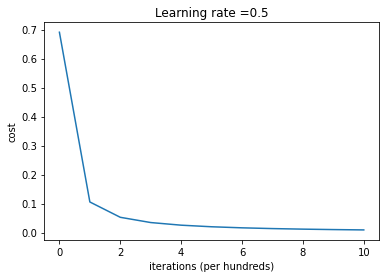

In [32]:
parameters = optimize(X_train, y_train, [X_train.shape[0],200,60,1], learning_rate = 0.5, num_iterations = 10001, print_cost=True)